# Exercise 7 - ML Algorithms in scikit-learn

## Understanding Supervised Learning

Machine learning tasks are generally categorized into:
- **Supervised Learning**: Labeled data is used. The algorithm learns to map inputs to outputs.
- **Unsupervised Learning**: No labels; the algorithm finds patterns in the data.
- **Reinforcement Learning**: The model learns through trial and error based on rewards.

We will focus on **Supervised Learning**, which includes:
- **Classification**: Predicting categories (e.g., spam vs. not spam)
- **Regression**: Predicting continuous values (e.g., house prices)

These models are trained using labeled datasets and evaluated based on prediction accuracy or error metrics.


### Practice
- Think of two examples each for classification and regression.
- Why might classification be important in healthcare?


In [8]:
# Your practice code/notes here
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Classification: Predicting Categories

In this task, we predict a discrete class or category.

### Use Case
Predicting the species of a flower based on features like petal width and sepal length.

We’ll use the **Iris dataset**, which includes:
- Inputs: sepal length, sepal width, petal length, petal width
- Outputs: species (setosa, versicolor, virginica)


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Practice
- Change `test_size` to 0.3 or 0.4. What changes?
- Try using `KNeighborsClassifier` instead of `RandomForestClassifier`.
- Which classifier performs best on this dataset?
- How does `KNeighborsClassifier` work compared to `RandomForestClassifier`?


In [22]:
# Your practice code/notes here
from sklearn.neighbors import KNeighborsClassifier
# Train model
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Visualizing the Impact of Data Splitting Ratios

Understanding how splitting your dataset impacts model training and evaluation is critical.

We typically divide data into three parts:
- **Training set**: Used to fit the model
- **Validation set**: Used to tune parameters and prevent overfitting
- **Test set**: Used to evaluate the final model performance

Below, we’ll explore how varying the split ratio affects accuracy.


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

# Try different split ratios
for test_size in [0.1, 0.2, 0.3, 0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Size: {test_size:.1f} -> Accuracy: {acc:.4f}")


Test Size: 0.1 -> Accuracy: 1.0000
Test Size: 0.2 -> Accuracy: 1.0000
Test Size: 0.3 -> Accuracy: 1.0000
Test Size: 0.4 -> Accuracy: 0.9833


### Practice
- Try test sizes of 0.05 and 0.5. What happens to accuracy and why?
- Add a second split (validation set) using:
```python
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
```
- Evaluate your model using the validation set before final testing.


In [12]:
# Your practice code/notes here


## Explanation: Train-Test-Validation Splits and Accuracy

### Why Split the Data?

We split data into:
- **Training set** (60–80%): Builds the model
- **Validation set** (10–20%): Helps tune and evaluate model hyperparameters
- **Test set** (10–20%): Tests final model on unseen data

**Without validation**, we risk overfitting: a model that performs well on training data but poorly on real data.

### Accuracy vs Other Metrics

- **Accuracy**: Good for balanced datasets
- **Precision/Recall**: Better for imbalanced data
- **F1 Score**: Combines precision and recall

**Real-World Use Cases**:
- Fraud detection (imbalanced): use precision/recall
- Image classification: accuracy often sufficient
- Spam filters: balance between precision and recall is key


In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

print(f"Original dataset size: {len(X)}")

# Split data into 80% train+validation and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Size after first split (train+val, test): {len(X_train_val)} / {len(X_test)}")

# Split train+validation into 75% train and 25% validation (which is 60/20 of the original dataset)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
print(f"Size after second split (train, val): {len(X_train)} / {len(X_val)}")

print(f"Final split sizes:")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Original dataset size: 150
Size after first split (train+val, test): 120 / 30
Size after second split (train, val): 90 / 30
Final split sizes:
Training set size: 90
Validation set size: 30
Test set size: 30


### Practice
- Evaluate a model using the validation set (`X_val`, `y_val`) after training on the training set (`X_train`, `y_train`).
- Compare model performance with different hyperparameters (e.g., `n_neighbors` for `KNeighborsClassifier`) using the validation set to choose the best ones before evaluating on the test set.
- Simulate overfitting by training a complex model on the training set and observing performance on both the training and validation sets.

In [14]:
# Your practice code here


In [15]:
# Your practice code/notes here


## Demo: Visualizing Training vs. Testing Data Size

This section helps you **visualize the effect** of changing split ratios on the amount of data used for training and testing.

We’ll plot how much data is allocated for training and testing for each split percentage.


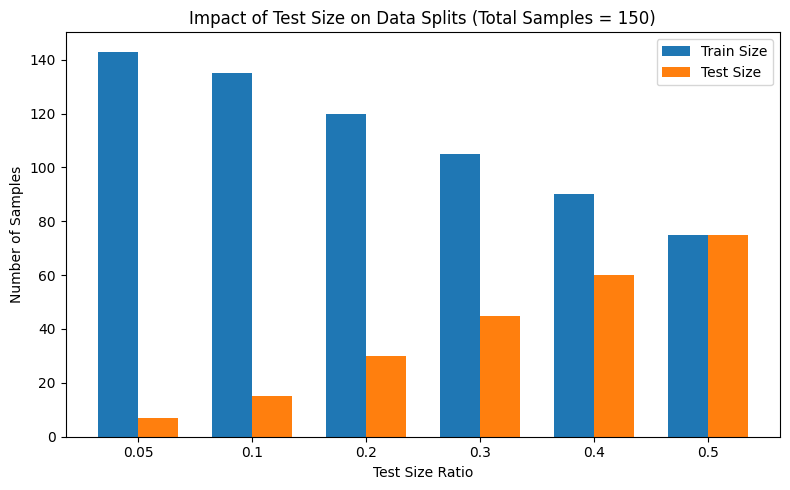

In [16]:
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import numpy as np # Import the numpy library for numerical operations

# Define a list of different test size ratios to visualize
split_ratios = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
total_samples = 150 # Define the total number of samples in the dataset

# Calculate the size of the training set for each split ratio
# This is done by subtracting the test size from the total samples
train_sizes = [total_samples - int(total_samples * s) for s in split_ratios]

# Calculate the size of the test set for each split ratio
# This is the total samples multiplied by the split ratio
test_sizes = [int(total_samples * s) for s in split_ratios]

# Create a new figure for the plot with a specified size
plt.figure(figsize=(8,5))

# Define the width of the bars in the bar chart
bar_width = 0.35
# Create an array of indices for the x-axis positions of the bars
index = np.arange(len(split_ratios))

# Create the bars for the training set sizes
# 'index' are the x positions, 'train_sizes' are the heights, 'bar_width' is the width, 'label' is for the legend
plt.bar(index, train_sizes, bar_width, label='Train Size')

# Create the bars for the test set sizes, offset by bar_width to appear next to train bars
# 'index + bar_width' shifts the bars, 'test_sizes' are the heights
plt.bar(index + bar_width, test_sizes, bar_width, label='Test Size')

# Add labels to the x and y axes
plt.xlabel('Test Size Ratio')
plt.ylabel('Number of Samples')

# Add a title to the plot
plt.title('Impact of Test Size on Data Splits (Total Samples = 150)')

# Set the x-axis tick positions and labels to correspond to the split ratios
plt.xticks(index + bar_width / 2, [str(r) for r in split_ratios])

# Add a legend to the plot to identify the bars
plt.legend()

# Adjust the plot to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

### Practice
- Modify `total_samples` to simulate larger datasets (e.g., 500, 1000).
- Add a validation set size and compare all three sets.

In [17]:
# Your practice code here


## Regression: Predicting Numeric Values

Regression is used when we predict a continuous value.

### Use Case
Predicting California housing prices based on:
- Median income
- House age
- Population
- Other features

We will use **Linear Regression** and evaluate with **Mean Squared Error (MSE)**.


In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and scale data
housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.5558915986952444


### Practice
- Replace `LinearRegression` with `DecisionTreeRegressor` and compare MSE.
- Try plotting predicted vs. actual values using matplotlib.


In [26]:
# Your practice code here
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.4924335028188953


## Optional: Explore More on Dataset Splitting

The code above demonstrates how to split a dataset into three distinct subsets:

1.  **Training Set**: This is the largest portion of the data (60% in the example). It is used to train the machine learning model, meaning the model learns the patterns and relationships within this data.
2.  **Validation Set**: This is an intermediate set (20% in the example). It is used *during* the model development process to:
    *   **Tune hyperparameters**: Hyperparameters are settings that are not learned from the data but are set before training (e.g., the number of trees in a Random Forest). The validation set helps you choose the best hyperparameters by evaluating model performance with different settings.
    *   **Prevent overfitting**: Overfitting occurs when a model learns the training data too well, including noise, and performs poorly on new data. By monitoring performance on the validation set during training, you can stop training early if the model starts performing worse on the validation data, even if it's still improving on the training data.
3.  **Test Set**: This set (20% in the example) is held back until the very end of the model development process. It is used for the **final evaluation** of the model's performance on completely unseen data. This provides an unbiased estimate of how well your model will perform in a real-world scenario.

**When and Why Use a Validation Set?**

A validation set is crucial when you need to make decisions about your model *before* the final evaluation. This includes:

*   **Comparing different algorithms**: If you're deciding between a Linear Regression and a Decision Tree, you can train both on the training set and evaluate them on the validation set to see which performs better.
*   **Tuning model complexity**: For models like Decision Trees or Neural Networks, you might adjust parameters that control their complexity. The validation set helps you find the right balance between complexity and generalization.
*   **Early stopping**: In iterative training processes (like neural networks), you use the validation set to determine when to stop training to avoid overfitting.

Using a validation set helps ensure that your model generalizes well to new data and that the performance reported on the test set is a realistic expectation of the model's performance in practice. Without it, you might tune your model based on the test set, leading to an overly optimistic evaluation and poor performance in the real world.

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into 60% train, 20% validation, and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

# Train model on the training set
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

# Evaluate on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.9333
Test Accuracy: 1.0000


### Practice
- Why might a validation set be important in high-stakes applications like medicine?
- Explore `StratifiedKFold` or `cross_val_score` to use cross-validation instead.
 + **Tip:** Review the API documentation:
   + https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
   + https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html



In [21]:
# Your practice code here
